# Optimization methods for neural networks
In this notebook we will explore some of the more wide-spread used optimization methods for gradient descent, which are useful to train Deep Neural Networks. 

# Probelm setup
To ilustrate the effect of choosing the different optimization methods we will use the MNIST dataset and train using different optimizers

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data pre processing

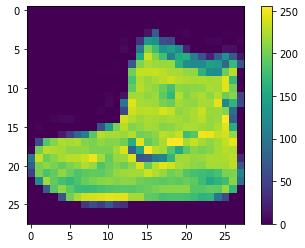

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

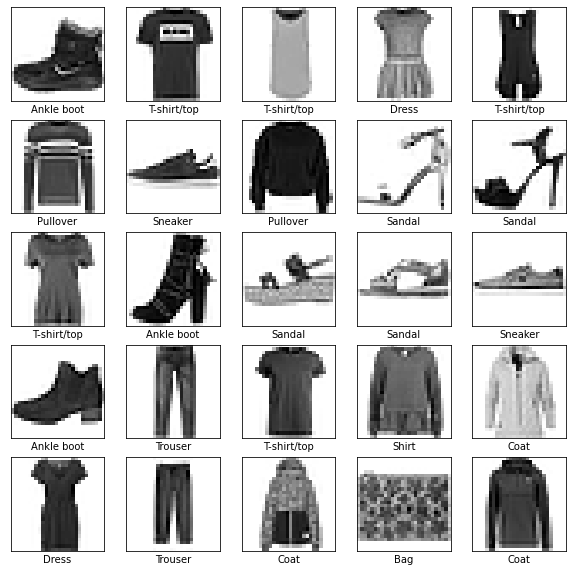

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
def plot_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def evaluate_optimizer(model, optimizer):
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, validation_split=0.2, epochs=10)
    plot_history(history)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    print('\nTest accuracy:', test_acc)

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Optimizers

## Momentum
Momentum is a technique which preserves part of the previous gradient to update the weights

$$
V_{dw} = \beta V_{dw} + (1- \beta) dw \\
V_{db} = \beta V_{db} + (1- \beta) db \\
V_{\theta} = \beta V_{\theta}^{t} + (1 -\beta) V_{\theta}^{t} \\
W = W - \alpha V_{dw}, b = b - \alpha V_{db}
$$
As you can see in the formula the previous gradient is taken as a part of the update in $\beta$ ratio, and add a portion of the new gradient $(1 - \beta)$

Epoch 1/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.7065 - accuracy: 0.7402 - val_loss: 0.7702 - val_accuracy: 0.7112
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6605 - accuracy: 0.7635 - val_loss: 0.6981 - val_accuracy: 0.7387
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6595 - accuracy: 0.7629 - val_loss: 0.6020 - val_accuracy: 0.8125
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6723 - accuracy: 0.7598 - val_loss: 0.8124 - val_accuracy: 0.7374
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.6315 - accuracy: 0.7883 - val_loss: 0.7859 - val_accuracy: 0.7237
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6631 - accuracy: 0.7602 - val_loss: 0.8849 - val_accuracy: 0.6568
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.7107 - accuracy: 0.7455 - val_loss: 0.6646 - val_accu

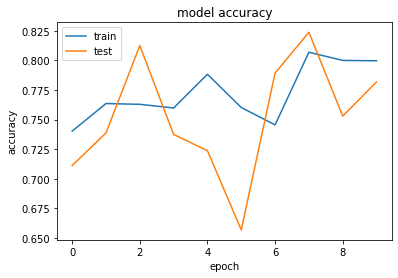

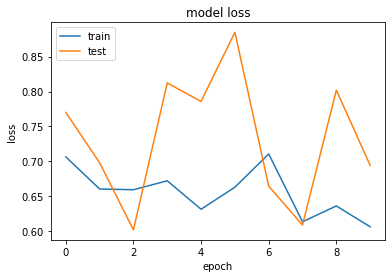

313/313 - 1s - loss: 0.7330 - accuracy: 0.7682

Test accuracy: 0.7681999802589417


In [14]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
evaluate_optimizer(model, opt)

## Adagrad
AdaGrad is a stochastic optimization method that adapts the learning rate to the parameters. It performs smaller updates for parameters associated with frequently occurring features, and larger updates for parameters associated with infrequently occurring features. In its update rule, Adagrad modifies the general learning rate  at each time step  for every parameter  based on the past gradients for

$$
\theta_{t+1, i} = \theta_{t,i} - \frac{\eta}{\sqrt{G_{t, ii} + \epsilon}} g_{t, i}
$$

Epoch 1/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5459 - accuracy: 0.8129 - val_loss: 0.6077 - val_accuracy: 0.8123
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5040 - accuracy: 0.8295 - val_loss: 0.5892 - val_accuracy: 0.8224
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4910 - accuracy: 0.8352 - val_loss: 0.5814 - val_accuracy: 0.8263
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4842 - accuracy: 0.8381 - val_loss: 0.5767 - val_accuracy: 0.8288
Epoch 5/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4797 - accuracy: 0.8391 - val_loss: 0.5735 - val_accuracy: 0.8293
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4762 - accuracy: 0.8404 - val_loss: 0.5711 - val_accuracy: 0.8300
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4733 - accuracy: 0.8410 - val_loss: 0.5692 - val_accura

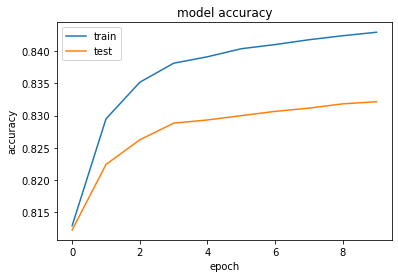

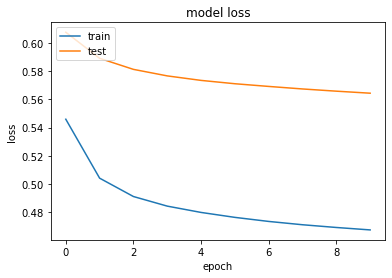

313/313 - 1s - loss: 0.5924 - accuracy: 0.8234

Test accuracy: 0.8234000205993652


In [15]:
opt = tf.keras.optimizers.Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07,name="Adagrad",)
evaluate_optimizer(model, opt)

## Adadelta
AdaDelta is a stochastic optimization technique that allows for per-dimension learning rate method for SGD. It is an extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate. Instead of accumulating all past squared gradients, Adadelta restricts the window of accumulated past gradients to a fixed size $w$.

Instead of inefficiently storing  previous squared gradients, the sum of gradients is recursively defined as a decaying average of all past squared gradients. The running average  at time step  then depends only on the previous average and current gradient:

$$
E[g^2]_t \\
E[g^2]_t = \gamma E[g^2]_{t -1} + (1 - \gamma)g^2_t
$$

Usually $\gamma$ is set around 0.9. Rewriting SGD upadate in terms od the parameter update vector:

$$
\Delta \theta_t = - \eta . g_{t,i} \\
\theta_{t + 1} = \theta_t +  \Delta \theta_t
$$

AdaDelta takes the form:
$$
\Delta \theta_t = - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t
$$

The main advantage of AdaDelta is that we do not need to set a default learning rate.

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4662 - accuracy: 0.8432 - val_loss: 0.5643 - val_accuracy: 0.8322
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4661 - accuracy: 0.8432 - val_loss: 0.5642 - val_accuracy: 0.8323
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4660 - accuracy: 0.8432 - val_loss: 0.5642 - val_accuracy: 0.8323
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4659 - accuracy: 0.8432 - val_loss: 0.5641 - val_accuracy: 0.8324
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4658 - accuracy: 0.8433 - val_loss: 0.5640 - val_accuracy: 0.8325
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4657 - accuracy: 0.8433 - val_loss: 0.5639 - val_accuracy: 0.8326
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4656 - accuracy: 0.8434 - val_loss: 0.5639 - val_accura

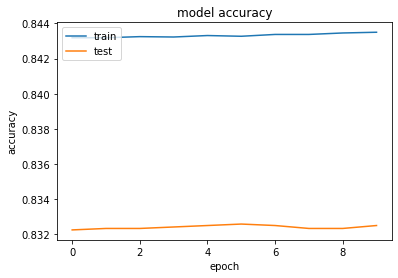

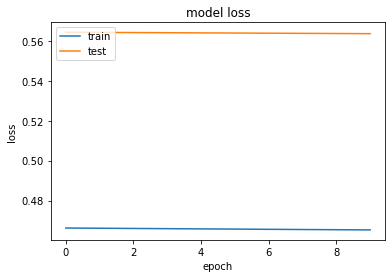

313/313 - 1s - loss: 0.5912 - accuracy: 0.8238

Test accuracy: 0.8238000273704529


In [16]:
opt = tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta")
evaluate_optimizer(model, opt)

## RMSProp
RMSProp is an unpublished adaptive learning rate optimizer proposed by Geoff Hinton. RMSProp were introduced to solve the inadequacies of adagrad. It also divides the learning rate by an average of squared gradients, but it also decays this quantity exponentially. The motivation is that the magnitude of gradients can differ for different weights, and can change during learning, making it hard to choose a single global learning rate. RMSProp tackles this by keeping a moving average of the squared gradient and adjusting the weight updates by this magnitude. The gradient updates are performed as:

$$
E[g^2]_t \\
E[g^2]_t = \gamma E[g^2]_{t -1} + (1 - \gamma)g^2_t \\
\Delta \theta_t = - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t
$$

Hinton suggests $\gamma = 0.9$, with a good default for $\eta$ as $0.001$.

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5279 - accuracy: 0.8134 - val_loss: 0.4279 - val_accuracy: 0.8482
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3883 - accuracy: 0.8598 - val_loss: 0.4022 - val_accuracy: 0.8633
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3521 - accuracy: 0.8737 - val_loss: 0.3618 - val_accuracy: 0.8770
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3299 - accuracy: 0.8809 - val_loss: 0.3610 - val_accuracy: 0.8792
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3184 - accuracy: 0.8870 - val_loss: 0.3902 - val_accuracy: 0.8734
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3091 - accuracy: 0.8911 - val_loss: 0.3690 - val_accuracy: 0.8812
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2972 - accuracy: 0.8956 - val_loss: 0.3916 - val_accuracy

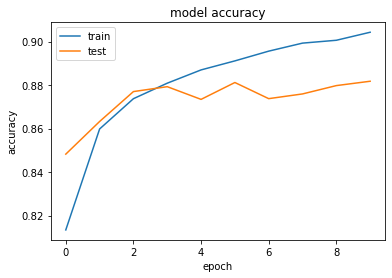

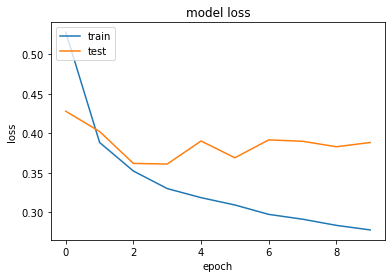

313/313 - 1s - loss: 0.4199 - accuracy: 0.8772

Test accuracy: 0.8772000074386597


In [9]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name="RMSprop")
evaluate_optimizer(model, opt)

## ADAM
Adam is an adaptive learning rate optimization algorithm that utilises both momentum and scaling, combining the benefits of RMSProp and SGD w/th Momentum. The optimizer is designed to be appropriate for non-stationary objectives and problems with very noisy and/or sparse gradients.

The weight updates are performed as:

$$
w_t = w_{t-1} - \eta \frac{\hat{m_t}}{\sqrt{\hat{v_t}} + \epsilon}
$$
with
$$ 
\hat{m_t} = \frac{m_t}{1 - \beta_1^t} \\
\hat{v_t} = \frac{v_t}{1 - \beta_2^t} \\
m_t = \beta_1 m_{t -1} + (1 - \beta_1) g_t \\
v_t = \beta_2 v_{t -1} + (1 - \beta_2) g_t^2 \\
$$

$\eta$ is the step size/learning rate, around 1e-3 in the original paper. $\epsilon$ is a small number, typically 1e-8 or 1e-10, to prevent dividing by zero.$\beta_1$ and $\beta_2$ are forgetting parameters, with typical values 0.9 and 0.999, respectively.

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2670 - accuracy: 0.9023 - val_loss: 0.3686 - val_accuracy: 0.8785
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2496 - accuracy: 0.9082 - val_loss: 0.3550 - val_accuracy: 0.8824
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2388 - accuracy: 0.9111 - val_loss: 0.3673 - val_accuracy: 0.8817
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2296 - accuracy: 0.9156 - val_loss: 0.3471 - val_accuracy: 0.8868
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2198 - accuracy: 0.9177 - val_loss: 0.3419 - val_accuracy: 0.8868
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2123 - accuracy: 0.9222 - val_loss: 0.3765 - val_accuracy: 0.8776
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2069 - accuracy: 0.9218 - val_loss: 0.3587 - val_accuracy:

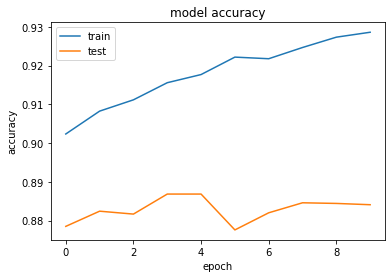

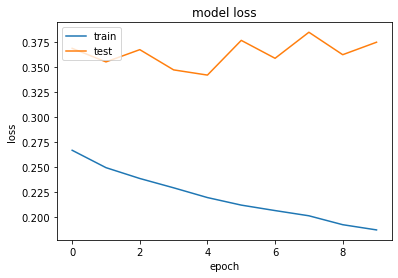

313/313 - 1s - loss: 0.4025 - accuracy: 0.8780

Test accuracy: 0.878000020980835


In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="Adam")
evaluate_optimizer(model, opt)